In [12]:
from BinaryClassifier import BinaryClassifier
from confusion_matrix import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def train_test_datasets(train_csv, test_csv):
    """Trains the classifier on a training set, then tests it on a different test set.
    Note: not suitable if the training and testing dataset is the same. Use cross-validation instead."""
    bc = BinaryClassifier()
    print("Training on {}...".format(train_csv))
    X_train, y_train = bc.parse_training_data(train_csv)
    bc.fit(X_train, y_train)
    
    print("Testing on {}...".format(test_csv))
    X_test, y_test = bc.parse_training_data(test_csv)
    report, cm = bc.evaluate_test(X_test, y_test)
    print(report)
    print(cm)
    plot_confusion_matrix(cm, bc.classes_, size=(10, 10))

In [36]:
def crossval_dataset(in_csv, test_size=0.5, cv=10, filename=None):
    bc = BinaryClassifier()
    X, y = bc.parse_training_data(in_csv)
    y_pred = cross_val_predict(bc, X, y, n_jobs=-1, cv=cv)
    classes = np.unique(y)
    
    cm = confusion_matrix(y, y_pred, labels=classes)
    report = classification_report(y, y_pred, digits=3, labels=classes)
    
    print("F1 (macro, CV): %0.4f" % sklearn.metrics.f1_score(y, y_pred, average='macro'))
    print(report)

    plot_confusion_matrix(cm, classes, size=(5, 5), filename=filename)

## Experiment 1: train from Clemens's data, test on NetBSD full

Training on dataset/clemens.csv...
Testing on dataset/netbsd.csv...
             precision    recall  f1-score   support

      alpha      1.000     0.588     0.741        85
      amd64      1.000     0.387     0.558       119
      arm64      0.000     0.000     0.000         0
      armel      0.000     0.000     0.000         0
      armhf      0.000     0.000     0.000         0
        avr      0.000     0.000     0.000         0
       cuda      0.000     0.000     0.000         0
       hppa      0.000     0.000     0.000         0
       i386      1.000     0.667     0.800       117
       ia64      0.000     0.000     0.000         0
       m68k      1.000     0.949     0.974        39
       mips      0.000     0.000     0.000         0
     mipsel      1.000     0.692     0.818        26
    powerpc      1.000     0.549     0.709        82
      ppc64      0.000     0.000     0.000         0
       s390      0.000     0.000     0.000         0
      s390x      0.000     0.0

/Users/pietro/anaconda/envs/binary/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pietro/anaconda/envs/binary/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/pietro/git/BinaryClassification/arch_classifier/confusion_matrix.py:13: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


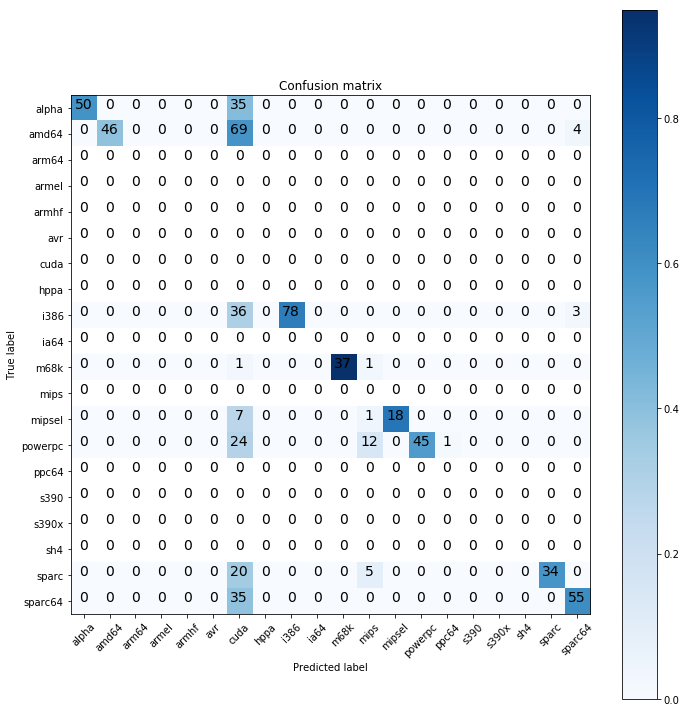

In [4]:
train_test_datasets('dataset/clemens.csv', 'dataset/netbsd.csv')

## Experiment 2: train and test on NetBSD full

In [11]:
crossval_dataset('dataset/netbsd.csv')

AttributeError: 'BinaryClassifier' object has no attribute 'classes_'

## Experiment 3: train on NetBSD .text sections, test on NetBSD full

Training on dataset/netbsd_text.csv...
Testing on dataset/netbsd.csv...
             precision    recall  f1-score   support

      alpha      1.000     0.647     0.786        85
      amd64      1.000     0.580     0.734       119
       i386      1.000     0.744     0.853       117
       m68k      1.000     0.974     0.987        39
     mipsel      0.141     0.885     0.243        26
    powerpc      1.000     0.817     0.899        82
      sparc      1.000     0.695     0.820        59
    sparc64      0.711     0.767     0.738        90

avg / total      0.922     0.728     0.790       617

[[55  0  0  0 26  0  0  4]
 [ 0 69  0  0 50  0  0  0]
 [ 0  0 87  0 20  0  0 10]
 [ 0  0  0 38  0  0  0  1]
 [ 0  0  0  0 23  0  0  3]
 [ 0  0  0  0 10 67  0  5]
 [ 0  0  0  0 13  0 41  5]
 [ 0  0  0  0 21  0  0 69]]


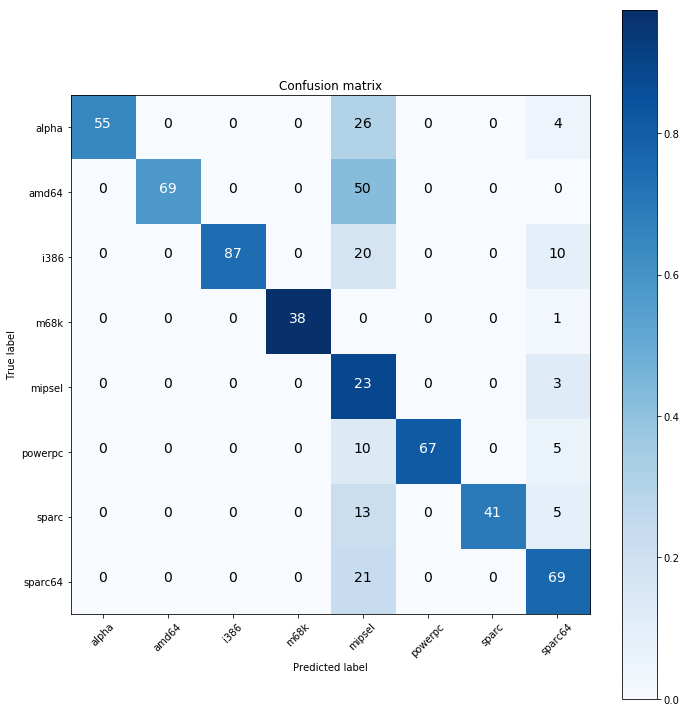

In [6]:
train_test_datasets('dataset/netbsd_text.csv', 'dataset/netbsd.csv')

## Experiment 4: train on Debian .text sections, test on Debian full

Training on dataset/debian_random_text.csv...
Testing on dataset/debian_random.csv...
             precision    recall  f1-score   support

      amd64      0.997     0.878     0.934       386
      arm64      1.000     0.636     0.778       382
      armel      1.000     0.896     0.945       385
      armhf      1.000     0.475     0.644       385
       i386      0.992     0.930     0.960       386
       mips      0.855     1.000     0.922       384
     mipsel      0.469     0.992     0.637       384
    ppc64el      1.000     0.887     0.940       380

avg / total      0.914     0.837     0.845      3072

[[339   0   0   0   2  41   4   0]
 [  0 243   0   0   0   3 136   0]
 [  1   0 345   0   0   1  38   0]
 [  0   0   0 183   0   2 200   0]
 [  0   0   0   0 359  12  15   0]
 [  0   0   0   0   0 384   0   0]
 [  0   0   0   0   1   2 381   0]
 [  0   0   0   0   0   4  39 337]]


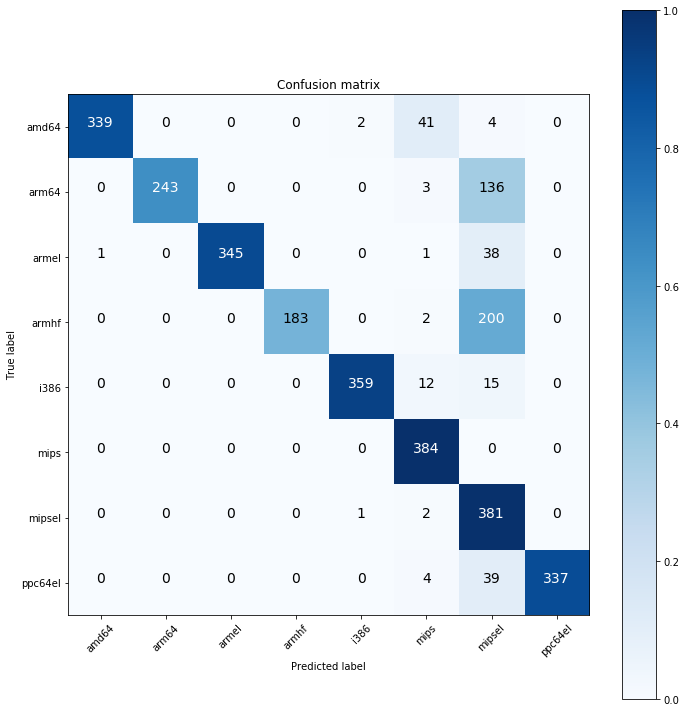

In [7]:
train_test_datasets('dataset/debian_random_text.csv', 'dataset/debian_random.csv')

## Experiment 5: train and test on Debian full

F1 (macro, CV): 0.9964
             precision    recall  f1-score   support

      amd64      0.995     0.992     0.994       386
      arm64      1.000     0.997     0.999       382
      armel      0.997     0.997     0.997       385
      armhf      0.997     0.995     0.996       385
       i386      0.992     0.995     0.994       386
       mips      0.997     1.000     0.999       384
     mipsel      0.995     0.995     0.995       384
    ppc64el      0.997     1.000     0.999       380

avg / total      0.996     0.996     0.996      3072



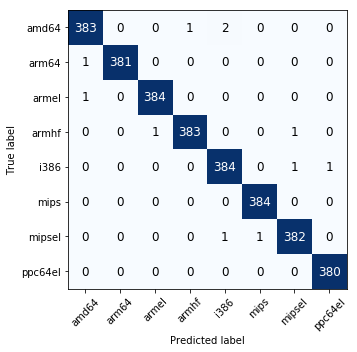

In [41]:
crossval_dataset('dataset/debian_random.csv', filename='figures/cm_debian.pdf')

## Experiment 7: train and test on Debian .text section

F1 (macro, CV): 0.9990 (+/- 0.0041)
             precision    recall  f1-score   support

      amd64      1.000     1.000     1.000       197
      arm64      1.000     1.000     1.000       199
      armel      0.995     1.000     0.997       198
      armhf      1.000     0.989     0.995       189
       i386      1.000     1.000     1.000       191
       mips      1.000     0.995     0.997       196
     mipsel      0.989     1.000     0.995       185
    ppc64el      1.000     1.000     1.000       180

avg / total      0.998     0.998     0.998      1535



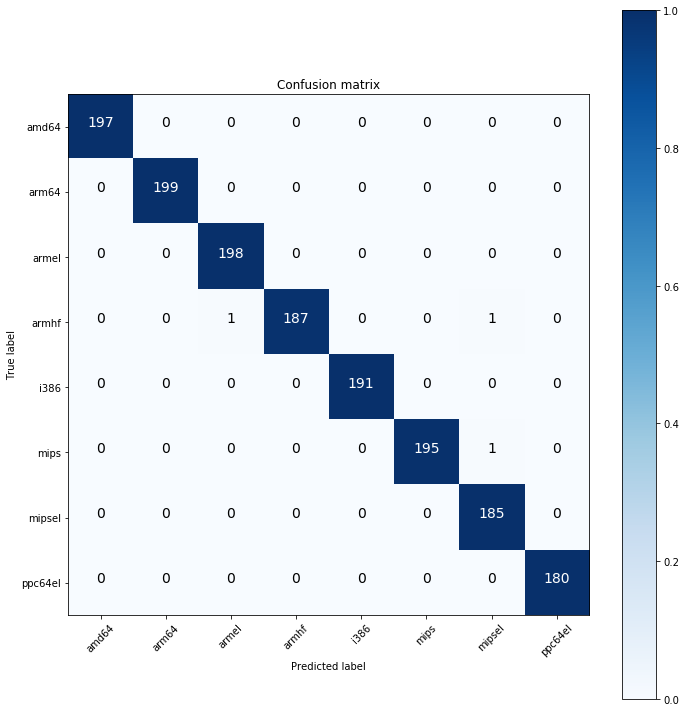

In [9]:
crossval_dataset('dataset/debian_random_text.csv')

## Experiment 8: train and test on Bao dataset

F1 (macro, CV): 0.9927
             precision    recall  f1-score   support

        x64      0.986     1.000     0.993      1097
        x86      1.000     0.985     0.993      1100

avg / total      0.993     0.993     0.993      2197



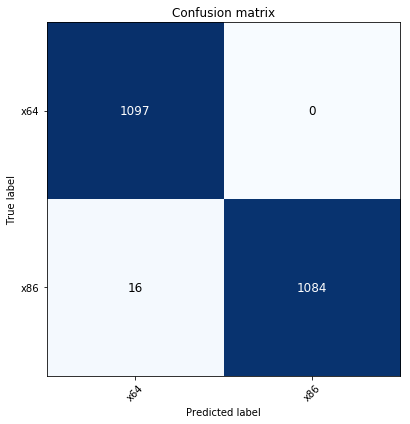

In [30]:
crossval_dataset('dataset/bao.csv')

## Experiment 9: train on DebianRandom, test on shellcodes

Training on dataset/debian_random.csv...
Testing on dataset/shellcode.csv...
             precision    recall  f1-score   support

      amd64      0.905     0.950     0.927        20
      arm64      0.000     0.000     0.000         0
      armel      0.000     0.000     0.000         0
      armhf      0.000     0.000     0.000         0
       i386      0.917     0.579     0.710        19
       mips      0.000     0.000     0.000         0
     mipsel      0.714     0.500     0.588        10
    ppc64el      0.000     0.000     0.000         0

avg / total      0.871     0.714     0.774        49

[[19  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 1  1  1  3 11  0  0  2]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  5  1]
 [ 0  0  0  0  0  0  0  0]]


/Users/pietro/anaconda/envs/binary/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/pietro/git/BinaryClassification/arch_classifier/confusion_matrix.py:13: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


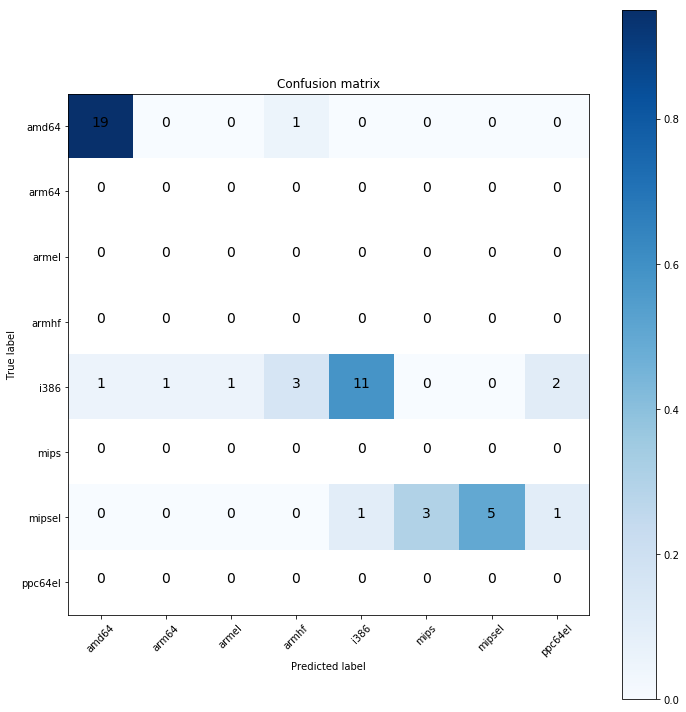

In [11]:
train_test_datasets('dataset/debian_random.csv', 'dataset/shellcode.csv')

## Experiment 10: cross-validate on shellcodes

F1 (macro, CV): 0.9346 (+/- 0.1655)
             precision    recall  f1-score   support

      amd64      1.000     0.846     0.917        13
        arm      1.000     0.909     0.952        11
       i386      0.692     0.900     0.783        10
     mipsel      1.000     1.000     1.000         3
        ppc      1.000     0.833     0.909         6
      sparc      0.667     1.000     0.800         2

avg / total      0.917     0.889     0.895        45



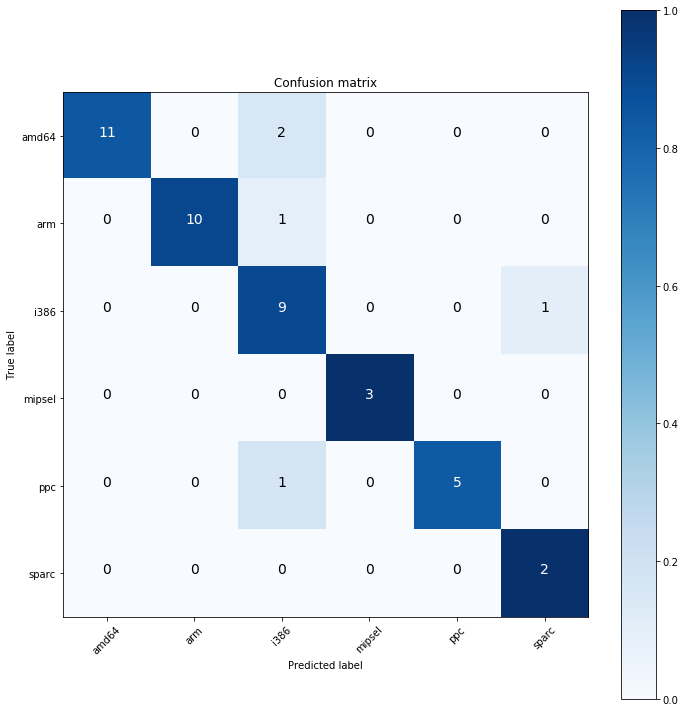

In [12]:
crossval_dataset('dataset/shellcode.csv', cv=5)

## Experiment 11: cross-validate on packed binaries

F1 (macro, CV): 0.9886
             precision    recall  f1-score   support

      amd64      0.996     0.993     0.995       277
      armel      0.992     0.987     0.989       237
      armhf      0.979     0.979     0.979       192
       i386      0.976     0.988     0.982       249
       mips      0.992     0.992     0.992       255
     mipsel      0.992     0.988     0.990       257
    ppc64el      0.993     0.993     0.993       278

avg / total      0.989     0.989     0.989      1745



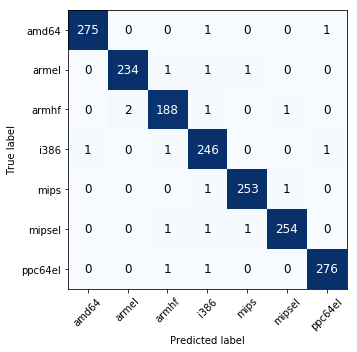

In [40]:
crossval_dataset('dataset/debian_random_packed.csv', filename='figures/cm_debian_packed.pdf')

## Experiment 12: train on DebianRandom, test on packed binaries

The results are very bad ---> the packer works fine

Training on dataset/debian_random.csv...
Testing on dataset/debian_random_packed_noheader.csv...


/Users/pietro/anaconda/envs/binary/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/pietro/anaconda/envs/binary/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/pietro/git/BinaryClassification/arch_classifier/confusion_matrix.py:13: RuntimeWarning: invalid value encountered in true_divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


             precision    recall  f1-score   support

      amd64      1.000     0.014     0.028       277
      arm64      0.000     0.000     0.000         0
      armel      0.000     0.000     0.000       237
      armhf      0.134     1.000     0.236       192
       i386      0.991     0.458     0.626       249
       mips      1.000     0.220     0.360       255
     mipsel      1.000     0.023     0.046       257
    ppc64el      1.000     0.475     0.644       278

avg / total      0.768     0.289     0.282      1745

[[  4   0   0 272   1   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0 237   0   0   0   0]
 [  0   0   0 192   0   0   0   0]
 [  0   0   0 135 114   0   0   0]
 [  0   0   0 199   0  56   0   0]
 [  0   0   0 251   0   0   6   0]
 [  0   0   0 146   0   0   0 132]]


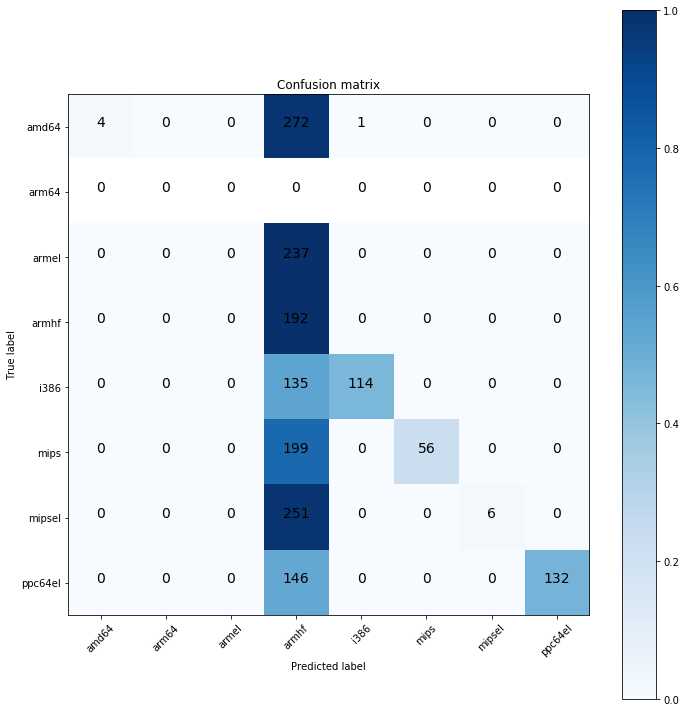

In [14]:
train_test_datasets('dataset/debian_random.csv', 'dataset/debian_random_packed_noheader.csv')